<a href="https://colab.research.google.com/github/MatheusHenriqueDaSilva/data_science/blob/main/Exercicio_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split


In [6]:
# Data understanding
DATA = pd.read_csv('/content/agrupamento.csv')
DATA.head()

,V1,V2,V3
0,0.274192,0.205828,0.465012
1,-0.112940,0.182955,0.104824
2,0.072626,-0.000491,0.194147
3,0.126573,0.027202,0.075395
4,0.080854,-0.144031,-0.199187


In [14]:
# Data understanding
DATA2 = pd.read_csv('/content/centroides_iniciais.csv')
DATA2

,V1,V2,V3
0,0.010759,0.150686,0.049970
1,0.911179,-0.010054,-0.093556
2,-0.526115,1.049235,-0.132915
3,0.603327,1.353277,0.159188
4,-0.084500,-0.260496,0.611731
5,1.345370,0.204004,1.050706
6,0.134371,0.893534,1.056753
7,1.010007,0.941614,1.153476
8,-0.167530,-0.030102,-0.103930
9,0.625067,0.077655,0.319642


In [7]:
def generate_metadata(dataframe):

    metadata2 = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata2=metadata2.sort_values(by='tipo')
    metadata2 = metadata2.reset_index(drop=True)

    return metadata2

metadados = generate_metadata(DATA)
metadados

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,V1,float64,0,0.0,4000
1,V2,float64,0,0.0,4000
2,V3,float64,0,0.0,4000


In [8]:
DATA.describe()

,V1,V2,V3
count,4000.000000,4000.000000,4000.000000
mean,0.496582,0.499443,0.496661
std,0.537474,0.536877,0.539613
min,-0.622092,-0.808655,-0.639912
25%,-0.003117,0.001785,0.002260
50%,0.496776,0.514215,0.499774
75%,0.990700,0.993515,0.995715
max,1.716932,1.667740,1.865618


Lista de vars para Label Encoding:  ['Gender']


{'encoders': {'Gender': LabelEncoder()}, 'columns': ['Gender']}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cl

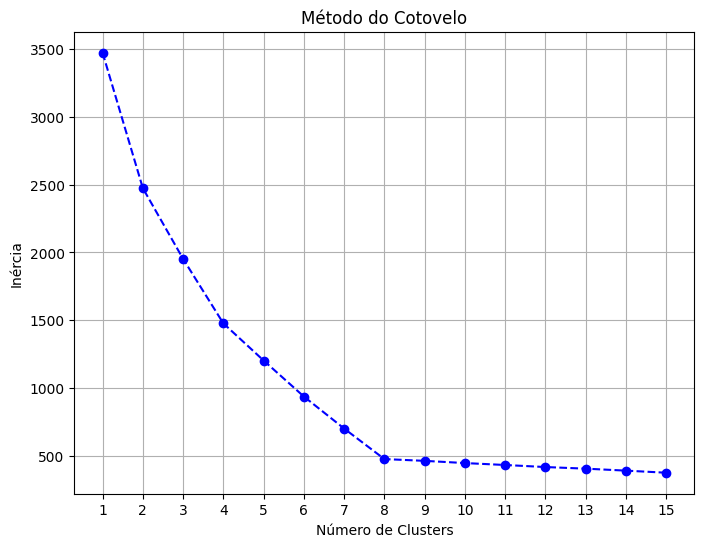

In [24]:
from sklearn.cluster import KMeans

X = DATA

num_rep = 16

# Calcular a inércia para diferentes números de clusters
inertia = []
for i in range(1, num_rep):
    kmeans = KMeans(n_clusters=i, random_state=0,  init=DATA2.head(i).to_numpy())
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_rep), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.xticks(range(1, num_rep))
plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cl

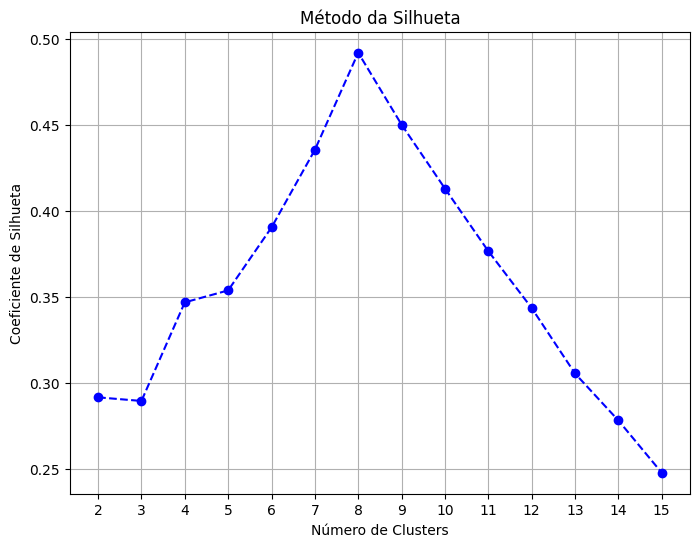

In [26]:
# Calcular a pontuação da silhueta para diferentes números de clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []

num_rep = 16
X = DATA

for n_clusters in range(2, num_rep):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, init=DATA2.head(n_clusters).to_numpy())
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico do método da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, num_rep), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.xticks(range(2, num_rep))
plt.grid(True)
plt.show()

In [28]:
inertia #obtendo o valor da função custo.

[3472.3222133639088,
 2473.6121935509063,
 1952.1391141260374,
 1476.7357779219235,
 1202.8594407261128,
 937.2694483717326,
 701.1672192269907,
 476.16917523774293,
 463.05116190286975,
 446.71619572655686,
 432.4654426875548,
 417.3929107404089,
 405.48250576295595,
 390.90262955159596,
 375.50299008036285]